**Problem Statement**:

Detecting kyphosis disease at the early stage in children will prevent abnormal spinal vertebrae problems.
The problem that we are going to solve here is that given a set of features that describe the absence or presence of kyphosis, our machine learning model must predict whether the kyphosis is present or absent. To train our machine learning model with kyphosis data, we will be using  childen dataset [Kyphosis](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv)

INPUTS:
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUT:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation



In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
data =pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv")
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [3]:
data.shape

(81, 4)

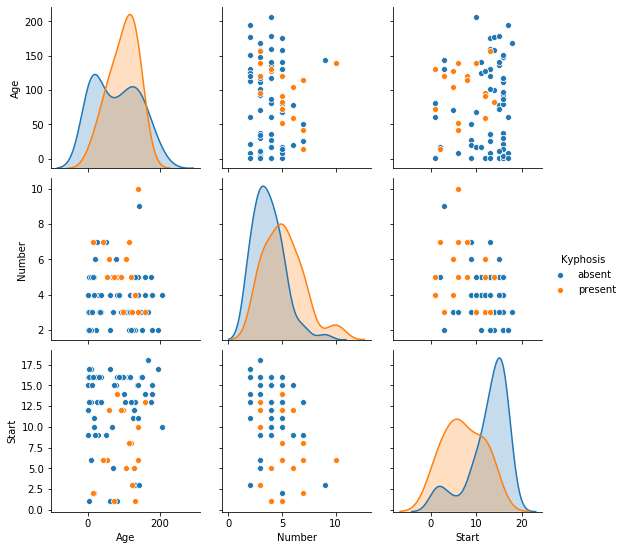

In [4]:
sns.pairplot(data,hue="Kyphosis")

In [5]:
# splitting the data set into unput and output

X=data.iloc[:,1:] # or X= data.drop("Kyphosis",axis=1)
y=data.Kyphosis

In [6]:
# train -test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=1)

In [7]:
# applying the decision tree algorithm 
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
# predicting od training data
y_train_pred= dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [10]:
confusion_matrix(y_train,y_train_pred
                )

array([[51,  0],
       [ 0, 13]], dtype=int64)

In [11]:
# predcition on test data 
# syntax : object name.predict(input values)
y_test_pred=dtree.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      absent       0.79      0.85      0.81        13
     present       0.33      0.25      0.29         4

    accuracy                           0.71        17
   macro avg       0.56      0.55      0.55        17
weighted avg       0.68      0.71      0.69        17



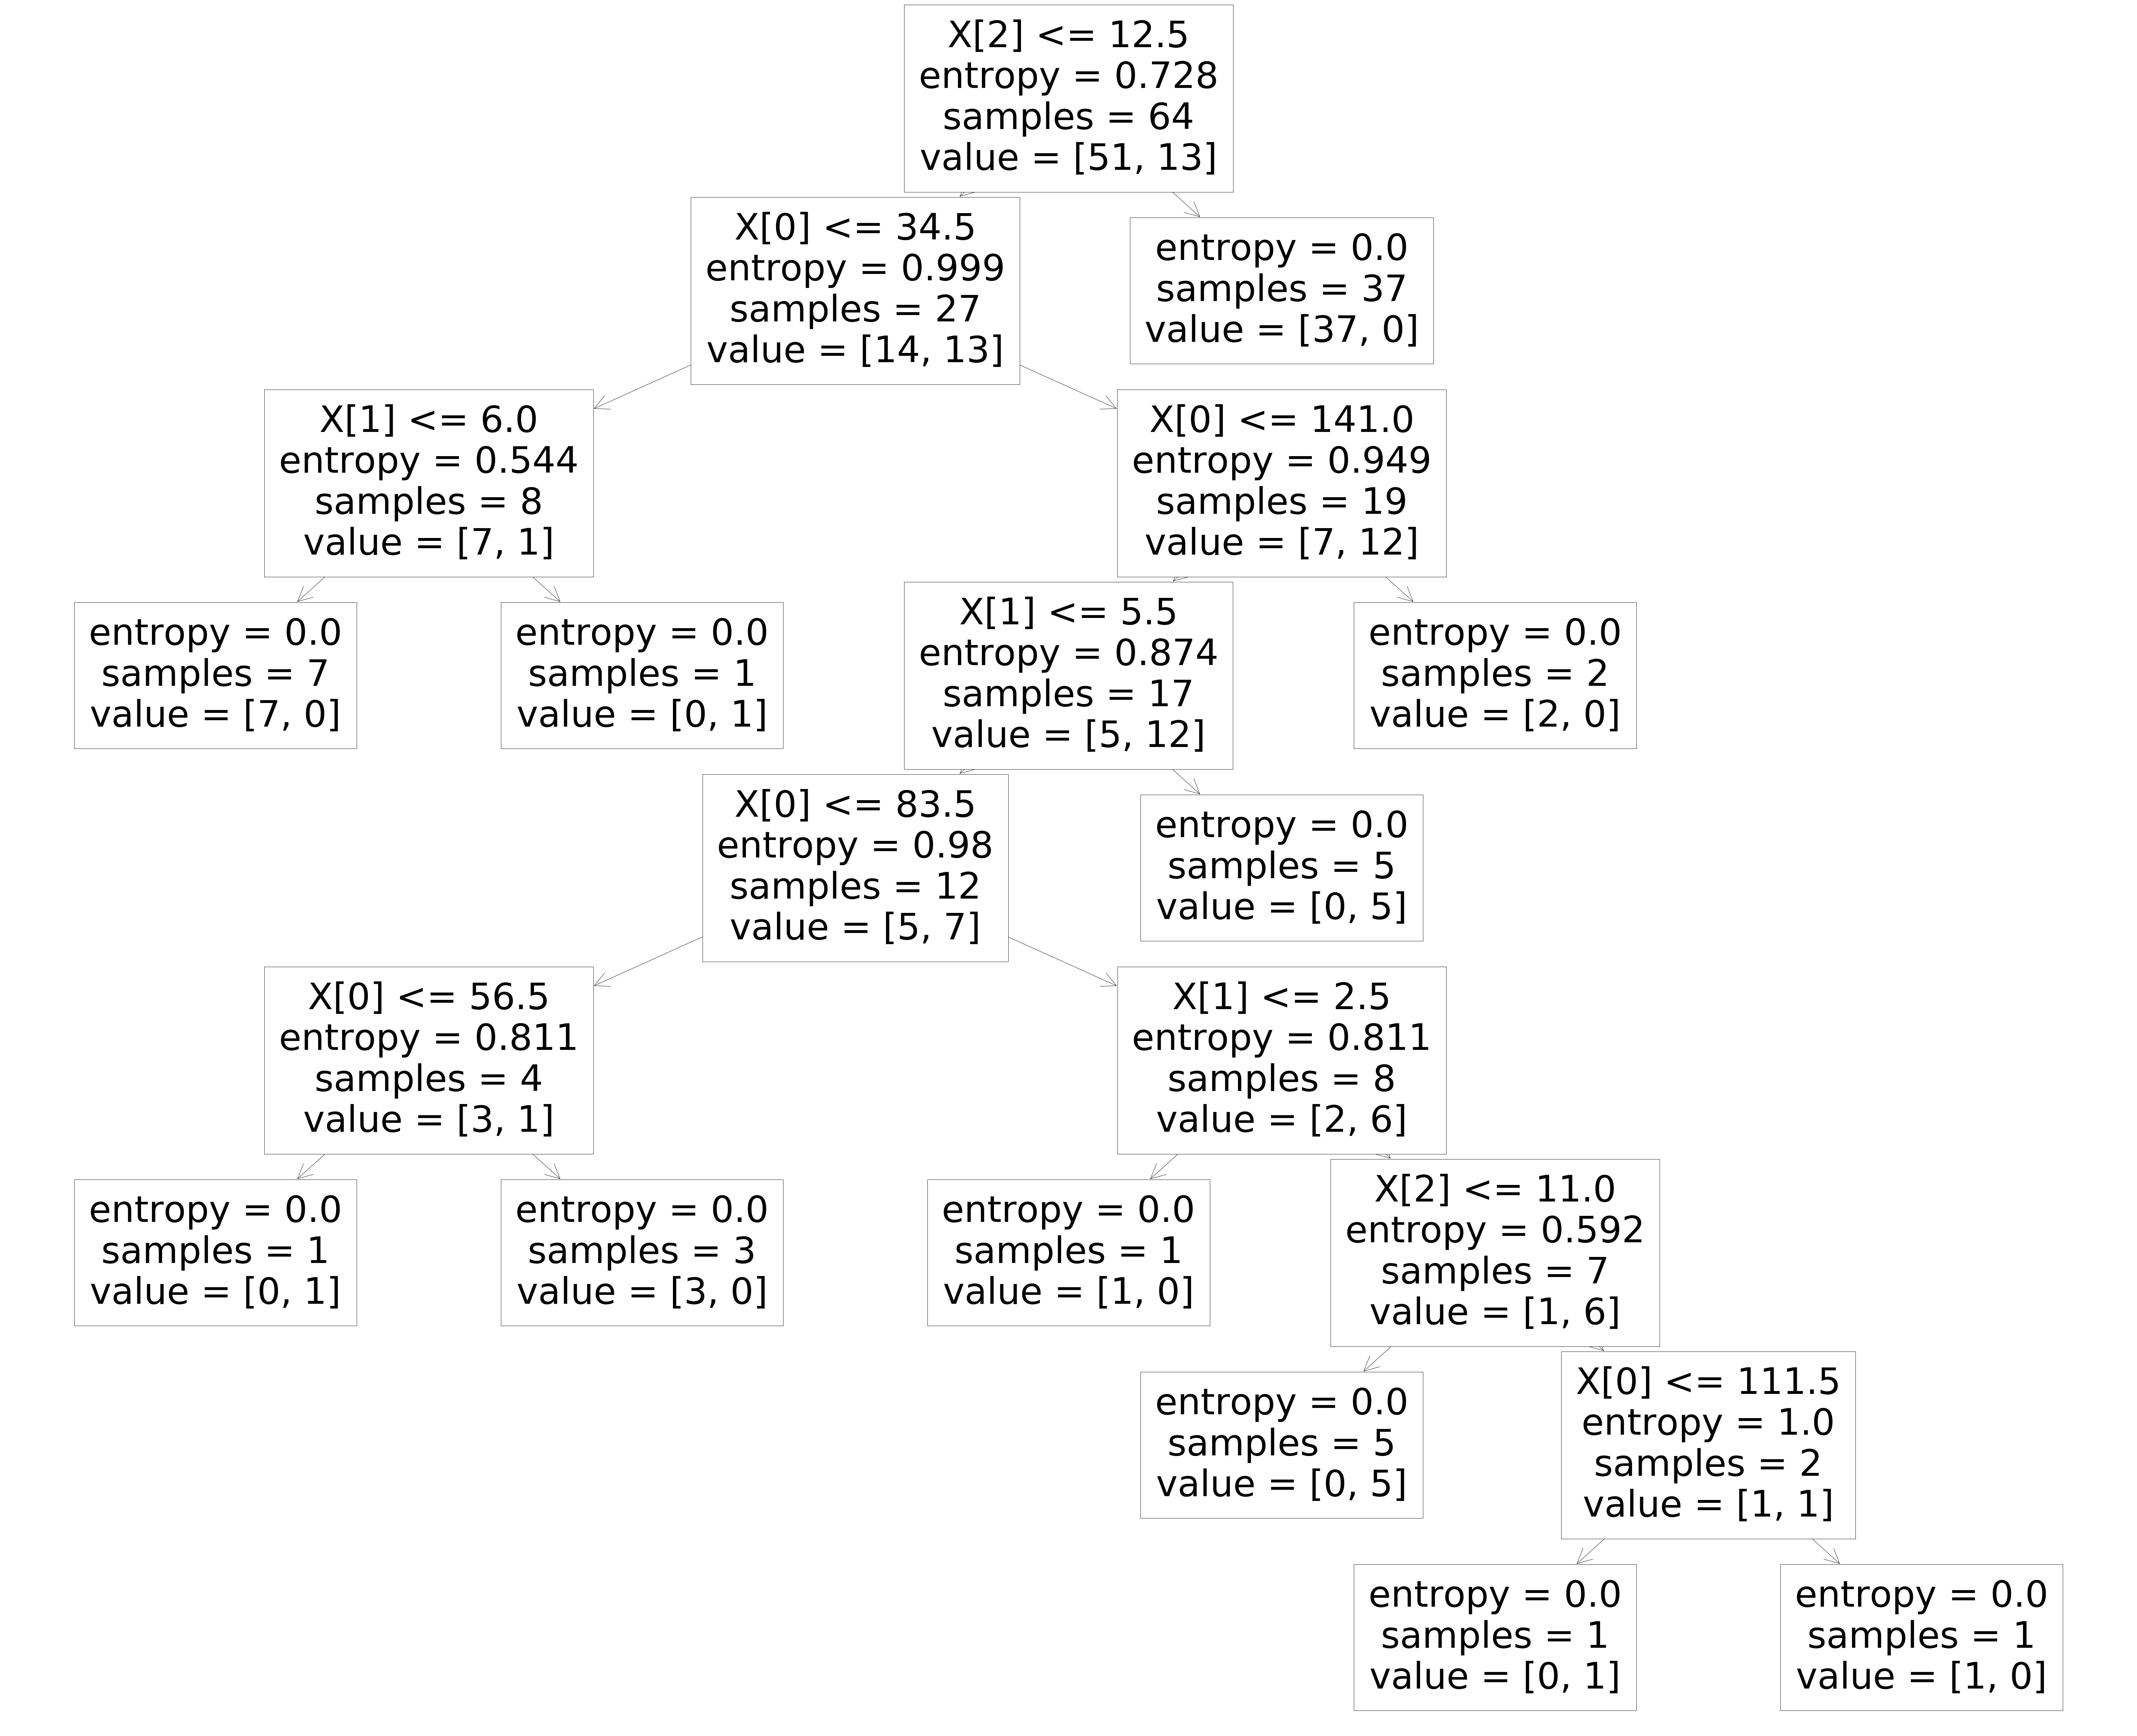

In [12]:
# visualization of the decision tree 
from sklearn import tree
import matplotlib.pyplot as plt
clf=tree.DecisionTreeClassifier()
plt.figure(figsize=(120,100))
tree.plot_tree(dtree)
plt.show()

In [13]:
# kfold cv:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree,X_train,y_train,cv=5)

array([0.76923077, 0.92307692, 0.76923077, 0.84615385, 0.75      ])

In [14]:
# hyper parameters 

In [15]:
grid_param={"criterion":["gini","entropy"],
            "max_depth":range(2,10,1),
            "min_samples_leaf":range(1,10,1)}

In [17]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=dtree,param_grid=grid_param)
# applting to the data set 
grid_search.fit(X_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
             

In [18]:
# which parameters that worked well 
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 9}

In [19]:
# we have to build the model with best parameters 
clf= DecisionTreeClassifier(criterion= 'gini', max_depth =2,
                            min_samples_leaf= 9)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
pred_test=clf.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

      absent       0.79      0.85      0.81        13
     present       0.33      0.25      0.29         4

    accuracy                           0.71        17
   macro avg       0.56      0.55      0.55        17
weighted avg       0.68      0.71      0.69        17

